In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Varun').getOrCreate()

In [5]:
data = [("Alice", 34), ("Bob", 45), ("Cathy", 29),('Alice',32)]
columns = ["Name", "Age"]
df = spark.createDataFrame(data, schema=columns)

#temporary view
df.createOrReplaceTempView("people")

# Querying the view using SQL
result = spark.sql("SELECT * FROM people WHERE Age > 30")
result.show()


+-----+---+
| Name|Age|
+-----+---+
|Alice| 34|
|  Bob| 45|
|Alice| 32|
+-----+---+



Pyspark SQL on DataFrame

In [7]:
spark.sql('select distinct name from people').show()

+-----+
| name|
+-----+
|Alice|
|  Bob|
|Cathy|
+-----+



In [8]:
spark.sql('select count(distinct name) from people').show()

+--------------------+
|count(DISTINCT name)|
+--------------------+
|                   3|
+--------------------+



In [9]:
spark.sql('select avg(age) from people').show()

+--------+
|avg(age)|
+--------+
|    35.0|
+--------+



In [14]:
import pandas as pd
data = {
    'Order ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    'Product': ['Laptop', 'Smartphone', 'Chair', 'Table', 'Blender', 'Refrigerator', 'Headphones'],
    'Category': ['Electronics', 'Electronics', 'Furniture', 'Furniture', 'Appliances', 'Appliances', 'Electronics'],
    'Price': [60000, 30000, 4500, 7000, 3500, 15000, 2000],
    'Quantity': [2, 3, 4, 2, 5, 1, 10],
    'Order Date': ['2023-01-15', '2023-02-20', '2023-01-10', '2023-03-18', '2023-02-25', '2023-01-12', '2023-03-05']
}
df = pd.DataFrame(data)
edf = spark.createDataFrame(df)

In [10]:
edf.show()

+--------+------------+-----------+-----+--------+----------+
|Order ID|     Product|   Category|Price|Quantity|Order Date|
+--------+------------+-----------+-----+--------+----------+
|    1001|      Laptop|Electronics|60000|       2|2023-01-15|
|    1002|  Smartphone|Electronics|30000|       3|2023-02-20|
|    1003|       Chair|  Furniture| 4500|       4|2023-01-10|
|    1004|       Table|  Furniture| 7000|       2|2023-03-18|
|    1005|     Blender| Appliances| 3500|       5|2023-02-25|
|    1006|Refrigerator| Appliances|15000|       1|2023-01-12|
|    1007|  Headphones|Electronics| 2000|      10|2023-03-05|
+--------+------------+-----------+-----+--------+----------+



In [11]:
edf.printSchema()

root
 |-- Order ID: long (nullable = true)
 |-- Product: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Price: long (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Order Date: string (nullable = true)



In [16]:
from pyspark.sql.functions import to_date
edf=edf.withColumn("Order Date", to_date("Order Date", "yyyy-MM-dd"))

In [17]:
edf.show()

+--------+------------+-----------+-----+--------+----------+
|Order ID|     Product|   Category|Price|Quantity|Order Date|
+--------+------------+-----------+-----+--------+----------+
|    1001|      Laptop|Electronics|60000|       2|2023-01-15|
|    1002|  Smartphone|Electronics|30000|       3|2023-02-20|
|    1003|       Chair|  Furniture| 4500|       4|2023-01-10|
|    1004|       Table|  Furniture| 7000|       2|2023-03-18|
|    1005|     Blender| Appliances| 3500|       5|2023-02-25|
|    1006|Refrigerator| Appliances|15000|       1|2023-01-12|
|    1007|  Headphones|Electronics| 2000|      10|2023-03-05|
+--------+------------+-----------+-----+--------+----------+



In [30]:
edf.createOrReplaceTempView("commercial")

In [20]:
#all categories
spark.sql('select distinct Category from commercial').show()

+-----------+
|   Category|
+-----------+
|Electronics|
|  Furniture|
| Appliances|
+-----------+



In [22]:
#the total number of items sold per category
spark.sql('select Category,sum(Quantity) from commercial group by Category').show()

+-----------+-------------+
|   Category|sum(Quantity)|
+-----------+-------------+
|Electronics|           15|
|  Furniture|            6|
| Appliances|            6|
+-----------+-------------+



In [26]:
from pyspark.sql.functions import col
edf=edf.withColumn('Total_sales',col('Price')*col('Quantity'))

In [31]:
edf.show()

+--------+------------+-----------+-----+--------+----------+-----------+
|Order ID|     Product|   Category|Price|Quantity|Order Date|Total_sales|
+--------+------------+-----------+-----+--------+----------+-----------+
|    1001|      Laptop|Electronics|60000|       2|2023-01-15|     120000|
|    1002|  Smartphone|Electronics|30000|       3|2023-02-20|      90000|
|    1003|       Chair|  Furniture| 4500|       4|2023-01-10|      18000|
|    1004|       Table|  Furniture| 7000|       2|2023-03-18|      14000|
|    1005|     Blender| Appliances| 3500|       5|2023-02-25|      17500|
|    1006|Refrigerator| Appliances|15000|       1|2023-01-12|      15000|
|    1007|  Headphones|Electronics| 2000|      10|2023-03-05|      20000|
+--------+------------+-----------+-----+--------+----------+-----------+



In [32]:
spark.sql('select * from commercial').show()

+--------+------------+-----------+-----+--------+----------+-----------+
|Order ID|     Product|   Category|Price|Quantity|Order Date|Total_sales|
+--------+------------+-----------+-----+--------+----------+-----------+
|    1001|      Laptop|Electronics|60000|       2|2023-01-15|     120000|
|    1002|  Smartphone|Electronics|30000|       3|2023-02-20|      90000|
|    1003|       Chair|  Furniture| 4500|       4|2023-01-10|      18000|
|    1004|       Table|  Furniture| 7000|       2|2023-03-18|      14000|
|    1005|     Blender| Appliances| 3500|       5|2023-02-25|      17500|
|    1006|Refrigerator| Appliances|15000|       1|2023-01-12|      15000|
|    1007|  Headphones|Electronics| 2000|      10|2023-03-05|      20000|
+--------+------------+-----------+-----+--------+----------+-----------+



In [28]:
spark

In [36]:
#category with the highest total sales
spark.sql('select Category,max(Total_sales) from commercial group by Category limit(1)').show()

+-----------+----------------+
|   Category|max(Total_sales)|
+-----------+----------------+
|Electronics|          120000|
+-----------+----------------+



In [4]:
from pyspark.sql.functions import split, col

In [25]:
import random
from datetime import datetime, timedelta

log_levels = ["INFO", "ERROR", "WARNING", "DEBUG"]
messages = [
    "User logged in",
    "Page not found",
    "Data uploaded successfully",
    "Connection timeout",
    "Invalid user credentials",
    "Server started",
    "File not found",
    "Operation completed",
    "Disk space low",
    "Cache cleared"
]

start_time = datetime(2024, 12, 18, 0, 0, 0)


with open("log.txt", "w") as file:
    for i in range(100): 
        random_offset = timedelta(
            hours=random.randint(0, 23),
            minutes=random.randint(0, 59),
            seconds=random.randint(0, 59)
        )
        timestamp = start_time + random_offset
        log_level = random.choice(log_levels)
        message = random.choice(messages)
        file.write(f"{timestamp.strftime('%Y-%m-%d %H:%M:%S')} {log_level} {message}\n")

print("Log file with varied timestamps generated: log.txt")


Log file with varied timestamps generated: log.txt


In [26]:
log_df=spark.read.text("log.txt")
log_df.show()

+--------------------+
|               value|
+--------------------+
|2024-12-18 02:59:...|
|2024-12-18 13:27:...|
|2024-12-18 15:25:...|
|2024-12-18 22:26:...|
|2024-12-18 18:43:...|
|2024-12-18 12:48:...|
|2024-12-18 22:36:...|
|2024-12-18 17:19:...|
|2024-12-18 12:19:...|
|2024-12-18 11:11:...|
|2024-12-18 14:21:...|
|2024-12-18 08:56:...|
|2024-12-18 02:59:...|
|2024-12-18 23:53:...|
|2024-12-18 21:20:...|
|2024-12-18 12:55:...|
|2024-12-18 06:50:...|
|2024-12-18 14:18:...|
|2024-12-18 03:33:...|
|2024-12-18 15:03:...|
+--------------------+
only showing top 20 rows



In [27]:
log_df.printSchema()

root
 |-- value: string (nullable = true)



In [28]:
from pyspark.sql.functions import regexp_replace

log_df = log_df.withColumn("value", regexp_replace(col("value"), r"\s+", " "))

In [29]:
from pyspark.sql.functions import split, concat_ws

log_df = log_df.withColumn("Timestamp", concat_ws(" ", split(col("value"), " ").getItem(0), split(col("value"), " ").getItem(1)))

In [30]:
log_df.show()

+--------------------+-------------------+
|               value|          Timestamp|
+--------------------+-------------------+
|2024-12-18 02:59:...|2024-12-18 02:59:35|
|2024-12-18 13:27:...|2024-12-18 13:27:24|
|2024-12-18 15:25:...|2024-12-18 15:25:36|
|2024-12-18 22:26:...|2024-12-18 22:26:49|
|2024-12-18 18:43:...|2024-12-18 18:43:47|
|2024-12-18 12:48:...|2024-12-18 12:48:48|
|2024-12-18 22:36:...|2024-12-18 22:36:48|
|2024-12-18 17:19:...|2024-12-18 17:19:37|
|2024-12-18 12:19:...|2024-12-18 12:19:07|
|2024-12-18 11:11:...|2024-12-18 11:11:59|
|2024-12-18 14:21:...|2024-12-18 14:21:06|
|2024-12-18 08:56:...|2024-12-18 08:56:26|
|2024-12-18 02:59:...|2024-12-18 02:59:25|
|2024-12-18 23:53:...|2024-12-18 23:53:59|
|2024-12-18 21:20:...|2024-12-18 21:20:03|
|2024-12-18 12:55:...|2024-12-18 12:55:44|
|2024-12-18 06:50:...|2024-12-18 06:50:21|
|2024-12-18 14:18:...|2024-12-18 14:18:44|
|2024-12-18 03:33:...|2024-12-18 03:33:59|
|2024-12-18 15:03:...|2024-12-18 15:03:00|
+----------

In [31]:
log_df=log_df.withColumn("LogLevel", split(col("value"), " ").getItem(2)) 
               

In [32]:
log_df=log_df.withColumn("Message", split(col("value"), " ", 4).getItem(3)) 

In [33]:
log_df.show()

+--------------------+-------------------+--------+--------------------+
|               value|          Timestamp|LogLevel|             Message|
+--------------------+-------------------+--------+--------------------+
|2024-12-18 02:59:...|2024-12-18 02:59:35|    INFO|  Connection timeout|
|2024-12-18 13:27:...|2024-12-18 13:27:24| WARNING|  Connection timeout|
|2024-12-18 15:25:...|2024-12-18 15:25:36| WARNING|      User logged in|
|2024-12-18 22:26:...|2024-12-18 22:26:49|   DEBUG|       Cache cleared|
|2024-12-18 18:43:...|2024-12-18 18:43:47|    INFO|  Connection timeout|
|2024-12-18 12:48:...|2024-12-18 12:48:48| WARNING|       Cache cleared|
|2024-12-18 22:36:...|2024-12-18 22:36:48|    INFO| Operation completed|
|2024-12-18 17:19:...|2024-12-18 17:19:37|   DEBUG|  Connection timeout|
|2024-12-18 12:19:...|2024-12-18 12:19:07|   DEBUG|      Page not found|
|2024-12-18 11:11:...|2024-12-18 11:11:59|   ERROR|      Page not found|
|2024-12-18 14:21:...|2024-12-18 14:21:06|   ERROR|

In [34]:
log_df.show(truncate=False)

+----------------------------------------------------+-------------------+--------+--------------------------+
|value                                               |Timestamp          |LogLevel|Message                   |
+----------------------------------------------------+-------------------+--------+--------------------------+
|2024-12-18 02:59:35 INFO Connection timeout         |2024-12-18 02:59:35|INFO    |Connection timeout        |
|2024-12-18 13:27:24 WARNING Connection timeout      |2024-12-18 13:27:24|WARNING |Connection timeout        |
|2024-12-18 15:25:36 WARNING User logged in          |2024-12-18 15:25:36|WARNING |User logged in            |
|2024-12-18 22:26:49 DEBUG Cache cleared             |2024-12-18 22:26:49|DEBUG   |Cache cleared             |
|2024-12-18 18:43:47 INFO Connection timeout         |2024-12-18 18:43:47|INFO    |Connection timeout        |
|2024-12-18 12:48:48 WARNING Cache cleared           |2024-12-18 12:48:48|WARNING |Cache cleared             |
|

In [35]:
log_df.printSchema()

root
 |-- value: string (nullable = true)
 |-- Timestamp: string (nullable = false)
 |-- LogLevel: string (nullable = true)
 |-- Message: string (nullable = true)



In [37]:
log_df.groupBy("LogLevel").count().show()

+--------+-----+
|LogLevel|count|
+--------+-----+
|    INFO|   25|
|   ERROR|   30|
| WARNING|   18|
|   DEBUG|   27|
+--------+-----+



In [78]:
#Filter and display only the ERROR logs.
log_df[log_df['LogLevel']=='ERROR'].show()

+--------------------+-------------------+--------+--------------------+
|               value|          Timestamp|LogLevel|             Message|
+--------------------+-------------------+--------+--------------------+
|2024-12-18 00:00:...|2024-12-18 00:00:28|   ERROR|  Connection timeout|
|2024-12-18 00:00:...|2024-12-18 00:00:20|   ERROR| Operation completed|
|2024-12-18 00:00:...|2024-12-18 00:00:22|   ERROR|       Cache cleared|
|2024-12-18 00:01:...|2024-12-18 00:01:00|   ERROR|      User logged in|
|2024-12-18 00:02:...|2024-12-18 00:02:40|   ERROR|      Disk space low|
|2024-12-18 00:02:...|2024-12-18 00:02:50|   ERROR|Invalid user cred...|
|2024-12-18 00:01:...|2024-12-18 00:01:14|   ERROR|      File not found|
|2024-12-18 00:01:...|2024-12-18 00:01:20|   ERROR|      File not found|
|2024-12-18 00:03:...|2024-12-18 00:03:25|   ERROR|      Server started|
|2024-12-18 00:01:...|2024-12-18 00:01:24|   ERROR|      File not found|
|2024-12-18 00:01:...|2024-12-18 00:01:26|   ERROR|

In [40]:
#Group logs by hour and count the number of logs in each hour.
from pyspark.sql.functions import hour,count
hr=log_df.withColumn('Hour',hour('Timestamp'))
hr=hr.groupby('Hour').count()

In [41]:
hr.describe()

DataFrame[summary: string, Hour: string, count: string]

In [42]:
hr.show()

+----+-----+
|Hour|count|
+----+-----+
|  12|    6|
|  22|    3|
|   1|    3|
|  13|    2|
|   6|    5|
|  16|    3|
|   3|    3|
|  20|    5|
|   5|    4|
|  19|    4|
|  15|    5|
|  17|    9|
|   9|    2|
|   4|    1|
|   8|    5|
|  23|    1|
|   7|    4|
|  10|    5|
|  21|    5|
|  11|    3|
+----+-----+
only showing top 20 rows



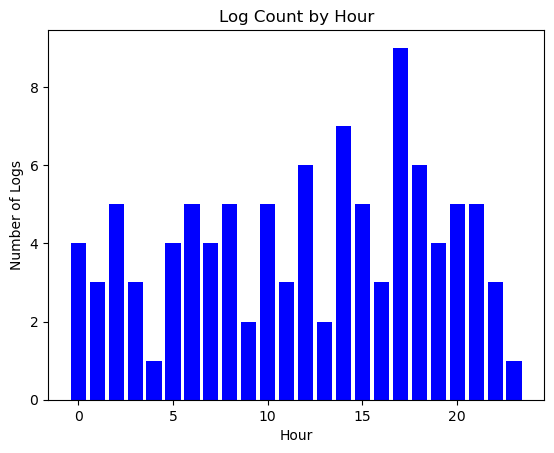

In [45]:
#hour vs number of logs
import  matplotlib.pyplot as plt
hr = hr.toPandas()
plt.bar(hr["Hour"], hr["count"], color='blue')
plt.xlabel("Hour")
plt.ylabel("Number of Logs")
plt.title("Log Count by Hour")
plt.show()